In [1]:
import requests
from bs4 import BeautifulSoup
res=requests.get('https://www.coingecko.com/zh-tw/%E5%8C%AF%E7%8E%87%E8%B5%B0%E5%8B%A2%E5%9C%96/%E6%AF%94%E7%89%B9%E5%B9%A3/usd')
soup=BeautifulSoup(res.text,"lxml")

In [2]:
data_prices=soup.select('#coin_maxd_historical_price_chart')[0].prettify('utf-8').decode('utf-8')

In [3]:
import re
m=re.search('<div data-prices="(.*?)"' ,data_prices)

In [4]:
import json
jd=json.loads(m.group(1))
#jd

In [5]:
import pandas
df=pandas.DataFrame(jd)
df

,0,1
0,1.367107e+12,135.300000
1,1.367194e+12,141.960000
2,1.367280e+12,135.300000
3,1.367366e+12,117.000000
4,1.367453e+12,103.430000
5,1.367539e+12,91.010000
6,1.367626e+12,111.250000
7,1.367712e+12,116.790000
8,1.367798e+12,118.330000
9,1.367885e+12,106.400000


In [6]:
df.columns=['datetime','twd']

In [7]:
df['datetime']=pandas.to_datetime(df['datetime'],unit='ms')

In [8]:
df.head()

,datetime,twd
0,2013-04-28,135.30
1,2013-04-29,141.96
2,2013-04-30,135.30
3,2013-05-01,117.00
4,2013-05-02,103.43


In [9]:
df.index=df['datetime']

Populating the interactive namespace from numpy and matplotlib


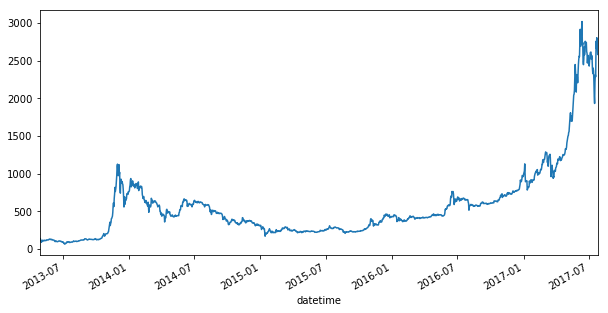

In [10]:
%pylab inline
df['twd'].plot(kind='line',figsize=[10,5])

In [29]:
df['ma7']=df['twd'].rolling(window=7).mean()

In [31]:
df.head()

,datetime,twd,ma7
datetime,,,
2013-04-28,2013-04-28,135.30,NaN
2013-04-29,2013-04-29,141.96,NaN
2013-04-30,2013-04-30,135.30,NaN
2013-05-01,2013-05-01,117.00,NaN
2013-05-02,2013-05-02,103.43,NaN


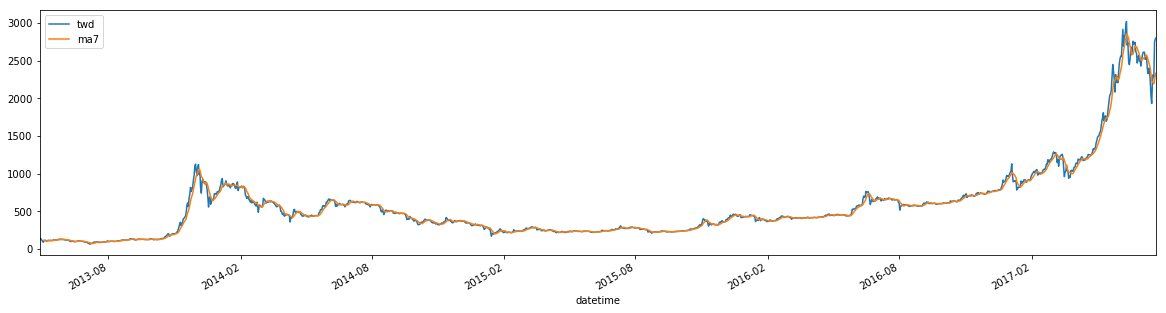

In [34]:
df[['twd','ma7']].plot(kind='line',figsize=[20,5])

In [38]:
df2=df[df['datetime']>='2017-03-01']

In [39]:
df2.head()

,datetime,twd,ma7
datetime,,,
2017-03-01,2017-03-01,1227.477149,1186.791447
2017-03-02,2017-03-02,1262.081000,1197.709477
2017-03-03,2017-03-03,1289.540612,1213.233708
2017-03-04,2017-03-04,1268.814532,1230.292401
2017-03-05,2017-03-05,1276.233000,1243.943830


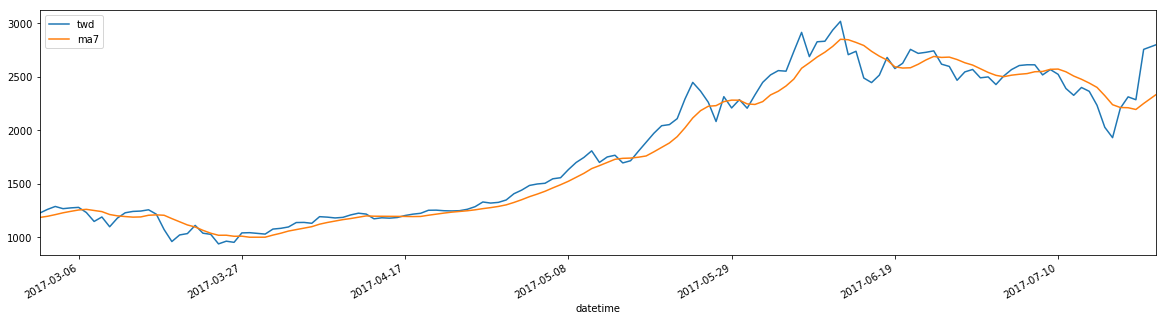

In [40]:
df2[['twd','ma7']].plot(kind='line',figsize=[20,5])